# Analysis of the Quantity of Background Checks for Guns and Educational and Economic Factors


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



Data Set: gun_data.csv.

The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase.

Data Set: us_census_data.csv.

The database has some census data by state. Most variables just have data for one year, but a few have data for more than one year.

The gun data dataset has a column with the total checks by state and month\year. I choose to use only the data between 2011 and 2015 because the data that I want to use in US Census database is from 2011 to 2015. In US Census I also have the population estimates for 2016. I Will use the population data to create the column checks percapita using the total checks for Gun Data and the Population Estimates from US Census data.

Dependent Variable -> Checks percapita.

Indepedent variables -> High school or higher percent, bachelor degree or higher, labor force percent, median household income, percapita income, poverty percent.

Questions filtered:
1. What is the state with more and the less checks? 
2. The more educated are the people the less guns they will buy?
3. The more wealthy are people the less guns they will buy?

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [27]:
import pandas as pd
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns

sns.set_style("dark")


%matplotlib inline

In [28]:
gun_data = pd.read_csv("gun_data.csv")

us_census_data = pd.read_csv("us_census_data.csv")


In [29]:
#gun data information
print gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 28 columns):
month                        12485 non-null object
initials                     55 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun   

###### Information about Gun Data

month -> Month of the data

state -> State that the gun data is related

totals -> considering that totals is the sum of the all the background check that a store has to make in fbi database before a gun
are sold

In [30]:
#us_census_data information
print us_census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

###### Information about census data
Fact -> The fact column is a text that contais what is the information that each further column carries.<br>
The other columns are state's names with the information about the Fact column.

### Data Cleaning 

In [31]:
#look for the fact column to decide if I will do a analysis especific by year
pd.set_option('display.max_rows', 100)
#increase the colwidth to see the text clear
pd.set_option('max_colwidth',100)
us_census_data.Fact


0                                               Population estimates, July 1, 2016,  (V2016)
1                                         Population estimates base, April 1, 2010,  (V2016)
2      Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
3                                                          Population, Census, April 1, 2010
4                                     Persons under 5 years, percent, July 1, 2016,  (V2016)
5                                              Persons under 5 years, percent, April 1, 2010
6                                    Persons under 18 years, percent, July 1, 2016,  (V2016)
7                                             Persons under 18 years, percent, April 1, 2010
8                                Persons 65 years and over, percent,  July 1, 2016,  (V2016)
9                                          Persons 65 years and over, percent, April 1, 2010
10                                          Female persons, percent,  

I choose some Facts to use in the analysis for the quantity of gun checks.

In [32]:
us_census_data.iloc[[0,1,34,35,38, 47,48, 49], 0]

0                                       Population estimates, July 1, 2016,  (V2016)
1                                 Population estimates base, April 1, 2010,  (V2016)
34       High school graduate or higher, percent of persons age 25 years+, 2011-2015
35          Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015
38    In civilian labor force, total, percent of population age 16 years+, 2011-2015
47                              Median household income (in 2015 dollars), 2011-2015
48                  Per capita income in past 12 months (in 2015 dollars), 2011-2015
49                                                       Persons in poverty, percent
Name: Fact, dtype: object

The population estimates is for 2016, and the other data are from 2011 to 2015. I will use the population estimates for 2016 and the Facts data from 2011 to 2015.

Since I will use only the data between 2011 and 2015 parsing the column month from a string to a date will help separate the data by year.

In [33]:
# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m')

#changing the month field into date
gun_data['datemonth'] = gun_data['month'].apply(parse_date)


In [34]:
#filtering the results by period and then grouping by state
gun_data['year'] = gun_data.datemonth.map(lambda x: x.year)
gun_data_state_period = gun_data[gun_data['year'].isin([2011,2012,2013,2014,2015])]
gun_data_state_period = gun_data_state_period.groupby('state').sum()

gun_data_state_period.head(10)

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year
state,,,,,,,,,,,,,,,,,,,,,
Alabama,"561,878.00",nan,"924,870.00","880,782.00","28,581.00",44794,3.00,606.00,842.00,16.00,...,1.00,0.00,38.00,48.00,6.00,9.00,5.00,0.00,2690152,120780
Alaska,"8,054.00",nan,"173,600.00","195,110.00","9,844.00",10982,16.00,354.00,464.00,0.00,...,0.00,0.00,10.00,9.00,0.00,0.00,0.00,0.00,422189,120780
Arizona,"268,585.00",nan,"657,814.00","482,914.00","31,839.00",30719,0.00,375.00,209.00,11.00,...,0.00,0.00,29.00,21.00,4.00,4.00,1.00,0.00,1596290,120780
Arkansas,"236,926.00",nan,"336,938.00","433,949.00","7,202.00",20772,"1,440.00",392.00,904.00,6.00,...,0.00,0.00,25.00,27.00,2.00,2.00,1.00,0.00,1223785,120780
California,"2,447,878.00",nan,"2,059,877.00","1,982,522.00","104,917.00",0,193.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6642294,120780
Colorado,"235,086.00",nan,"946,429.00","824,342.00","34,153.00",91404,19.00,38.00,18.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2133138,120780
Connecticut,"637,918.00",nan,"384,427.00","260,702.00","11,925.00",0,843.00,0.00,0.00,0.00,...,0.00,0.00,27.00,32.00,3.00,41.00,25.00,5.00,1295949,120780
Delaware,"9,064.00",nan,"89,164.00","80,283.00","3,316.00",3439,9.00,65.00,60.00,0.00,...,0.00,0.00,244.00,89.00,8.00,9.00,4.00,1.00,186642,120780
District of Columbia,28.00,nan,"2,309.00",126.00,1.00,20,15.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2500,120780


Separate the data from 2011 to 2015 in another dataset. We can observe for the sum of the column year that all states have data for all years.

In [35]:
gun_data_totals_state = gun_data_state_period.loc[gun_data_state_period.index, 'totals']
gun_data_totals_state = gun_data_totals_state.to_frame(name='totalChecks')

I choose to analyse only the total checks by state. Another dataset was created with the state as index and the total of checks as the only column.

In [36]:
#putting the population_estimates in another dataset to join with the total_checks data
df_pop_estimates = us_census_data.loc[0, gun_data_totals_state.index]
df_pop_estimates = df_pop_estimates.to_frame(name='population_estimates')
df_pop_estimates.loc[:, 'high_school_higher_p'] = pd.Series(us_census_data.loc[34, df_pop_estimates.index], index=df_pop_estimates.index)
df_pop_estimates.loc[:, 'bachelor_degree_higher_p'] = pd.Series(us_census_data.loc[35, df_pop_estimates.index], index=df_pop_estimates.index)
df_pop_estimates.loc[:, 'labor_force_p'] = pd.Series(us_census_data.loc[38, df_pop_estimates.index], index=df_pop_estimates.index)
df_pop_estimates.loc[:, 'median_household_income'] = pd.Series(us_census_data.loc[47, df_pop_estimates.index], index=df_pop_estimates.index)
df_pop_estimates.loc[:, 'percapita_income'] = pd.Series(us_census_data.loc[48, df_pop_estimates.index], index=df_pop_estimates.index)
df_pop_estimates.loc[:, 'poverty_p'] = pd.Series(us_census_data.loc[49, df_pop_estimates.index], index=df_pop_estimates.index)
df_pop_estimates.head()

,population_estimates,high_school_higher_p,bachelor_degree_higher_p,labor_force_p,median_household_income,percapita_income,poverty_p
state,,,,,,,
Alabama,"4,863,300",84.30%,23.50%,58.00%,"$43,623","$24,091",17.10%
Alaska,"741,894",92.10%,28.00%,67.70%,"$72,515","$33,413",9.90%
Arizona,"6,931,071",86.00%,27.50%,59.30%,"$50,255","$25,848",16.40%
Arkansas,"2,988,248",84.80%,21.10%,58.50%,"$41,371","$22,798",17.20%
California,"39,250,017",81.80%,31.40%,63.10%,"$61,818","$30,318",14.30%


I did the same with US Census data. Another dataset by state with the chosen data: population_estimates, high_school_higher_p, bachelor_degree_higher_p, labor_force_p, median_household_income, percapita_income and poverty_p.

In [37]:
#concatenating the data about the checks and the census data
gun_data_totals_state = pd.concat([gun_data_totals_state, df_pop_estimates], axis=1)
gun_data_totals_state.head(10)

,totalChecks,population_estimates,high_school_higher_p,bachelor_degree_higher_p,labor_force_p,median_household_income,percapita_income,poverty_p
state,,,,,,,,
Alabama,2690152,"4,863,300",84.30%,23.50%,58.00%,"$43,623","$24,091",17.10%
Alaska,422189,"741,894",92.10%,28.00%,67.70%,"$72,515","$33,413",9.90%
Arizona,1596290,"6,931,071",86.00%,27.50%,59.30%,"$50,255","$25,848",16.40%
Arkansas,1223785,"2,988,248",84.80%,21.10%,58.50%,"$41,371","$22,798",17.20%
California,6642294,"39,250,017",81.80%,31.40%,63.10%,"$61,818","$30,318",14.30%
Colorado,2133138,"5,540,545",90.70%,38.10%,67.60%,"$60,629","$32,217",11.00%
Connecticut,1295949,"3,576,452",89.90%,37.60%,67.20%,"$70,331","$38,803",9.80%
Delaware,186642,"952,065",88.40%,30.00%,63.10%,"$60,509","$30,554",11.70%
District of Columbia,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now I concatenated the dataset by state with the information about the checks for gun and the census data.

In [38]:
#deleting states that have no census data
gun_data_totals_state.drop('Mariana Islands', inplace=True)
gun_data_totals_state.drop('District of Columbia', inplace=True)
gun_data_totals_state.drop('Guam', inplace=True)
gun_data_totals_state.drop('Puerto Rico', inplace=True)
gun_data_totals_state.drop('Virgin Islands', inplace=True)


Some states has no census data about the interesting Facts and the best thing is delete them from the dataset.

In [39]:
import re
#checking the types
gun_data_totals_state.info()
#converting then into float
gun_data_totals_state['high_school_higher_p'] = gun_data_totals_state['high_school_higher_p'].replace( '[\$%]','', regex=True )
gun_data_totals_state['high_school_higher_p'] = gun_data_totals_state['high_school_higher_p'].apply(lambda x: float(re.sub(r'\,([^,]*)$', r'.\1', x).replace(',', '')))
gun_data_totals_state['population_estimates'] = gun_data_totals_state['population_estimates'].replace( '[\$%]','', regex=True )
gun_data_totals_state['population_estimates'] = gun_data_totals_state['population_estimates'].apply(lambda x: float(x.replace(',', '')))
gun_data_totals_state['bachelor_degree_higher_p'] = gun_data_totals_state['bachelor_degree_higher_p'].replace( '[\$%]','', regex=True )
gun_data_totals_state['bachelor_degree_higher_p'] = gun_data_totals_state['bachelor_degree_higher_p'].apply(lambda x: float(re.sub(r'\,([^,]*)$', r'.\1', x).replace(',', '')))
gun_data_totals_state['labor_force_p'] = gun_data_totals_state['labor_force_p'].replace( '[\$%]','', regex=True )
gun_data_totals_state['labor_force_p'] = gun_data_totals_state['labor_force_p'].apply(lambda x: float(re.sub(r'\,([^,]*)$', r'.\1', x).replace(',', '')))
gun_data_totals_state['median_household_income'] = gun_data_totals_state['median_household_income'].replace( '[\$%]','', regex=True )
gun_data_totals_state['median_household_income'] = gun_data_totals_state['median_household_income'].apply(lambda x: float(re.sub(r'\,([^,]*)$', r'.\1', x).replace(',', '')))
gun_data_totals_state['percapita_income'] = gun_data_totals_state['percapita_income'].replace( '[\$%]','', regex=True )
gun_data_totals_state['percapita_income'] = gun_data_totals_state['percapita_income'].apply(lambda x: float(re.sub(r'\,([^,]*)$', r'.\1', x).replace(',', '')))
gun_data_totals_state['poverty_p'] = gun_data_totals_state['poverty_p'].replace( '[\$%]','', regex=True )
gun_data_totals_state['poverty_p'] = gun_data_totals_state['poverty_p'].apply(lambda x: float(re.sub(r'\,([^,]*)$', r'.\1', x).replace(',', '')))
#checking the types
gun_data_totals_state.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 8 columns):
totalChecks                 50 non-null int64
population_estimates        50 non-null object
high_school_higher_p        50 non-null object
bachelor_degree_higher_p    50 non-null object
labor_force_p               50 non-null object
median_household_income     50 non-null object
percapita_income            50 non-null object
poverty_p                   50 non-null object
dtypes: int64(1), object(7)
memory usage: 3.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 8 columns):
totalChecks                 50 non-null int64
population_estimates        50 non-null float64
high_school_higher_p        50 non-null float64
bachelor_degree_higher_p    50 non-null float64
labor_force_p               50 non-null float64
median_household_income     50 non-null float64
percapita_income            50 non-null float64
poverty_p                

Deleting all the signs and commas from the data to parse then to float.

In [40]:
#Keeping all the percentage data equal
gun_data_totals_state['poverty_p'] = gun_data_totals_state['poverty_p'].apply(lambda x: x/100 if x>1 else x )
gun_data_totals_state['bachelor_degree_higher_p'] = gun_data_totals_state['bachelor_degree_higher_p'].apply(lambda x: x/100 if x>1 else x )
gun_data_totals_state['high_school_higher_p'] = gun_data_totals_state['high_school_higher_p'].apply(lambda x: x/100 if x>1 else x )
gun_data_totals_state['labor_force_p'] = gun_data_totals_state['labor_force_p'].apply(lambda x: x/100 if x>1 else x )

In [41]:
#I am assuming that some values should have a dot representing the decimals and don't so I am dividing then by 1000
gun_data_totals_state['median_household_income'] = gun_data_totals_state['median_household_income'].apply(lambda x: x/1000 if x>100 else x )
gun_data_totals_state['percapita_income'] = gun_data_totals_state['percapita_income'].apply(lambda x: x/1000 if x>100 else x )

In first cell the code are keeping all the percentage data equal by letting them be represented by decimals.

In the second cell I am assuming that some values should have a dot representing the decimals and don't so I am dividing then by 1000.

In [42]:
gun_data_totals_state['checks_percapita'] = gun_data_totals_state['totalChecks'] / gun_data_totals_state['population_estimates']

Creating the column checks percapita by dividing total checks by the population. I think fairly to consider the checks percapita than the total checks alone.

In [43]:
#change the format of floats
pd.options.display.float_format = '{:20,.2f}'.format

I am changing the format of floats to analyse better.

<a id='eda'></a>
## Exploratory Data Analysis


### What census data is most associated with high gun per capita?

In the graph above we can see that the distribution of checks_percapita is skewed, so I will use the median for comparison.


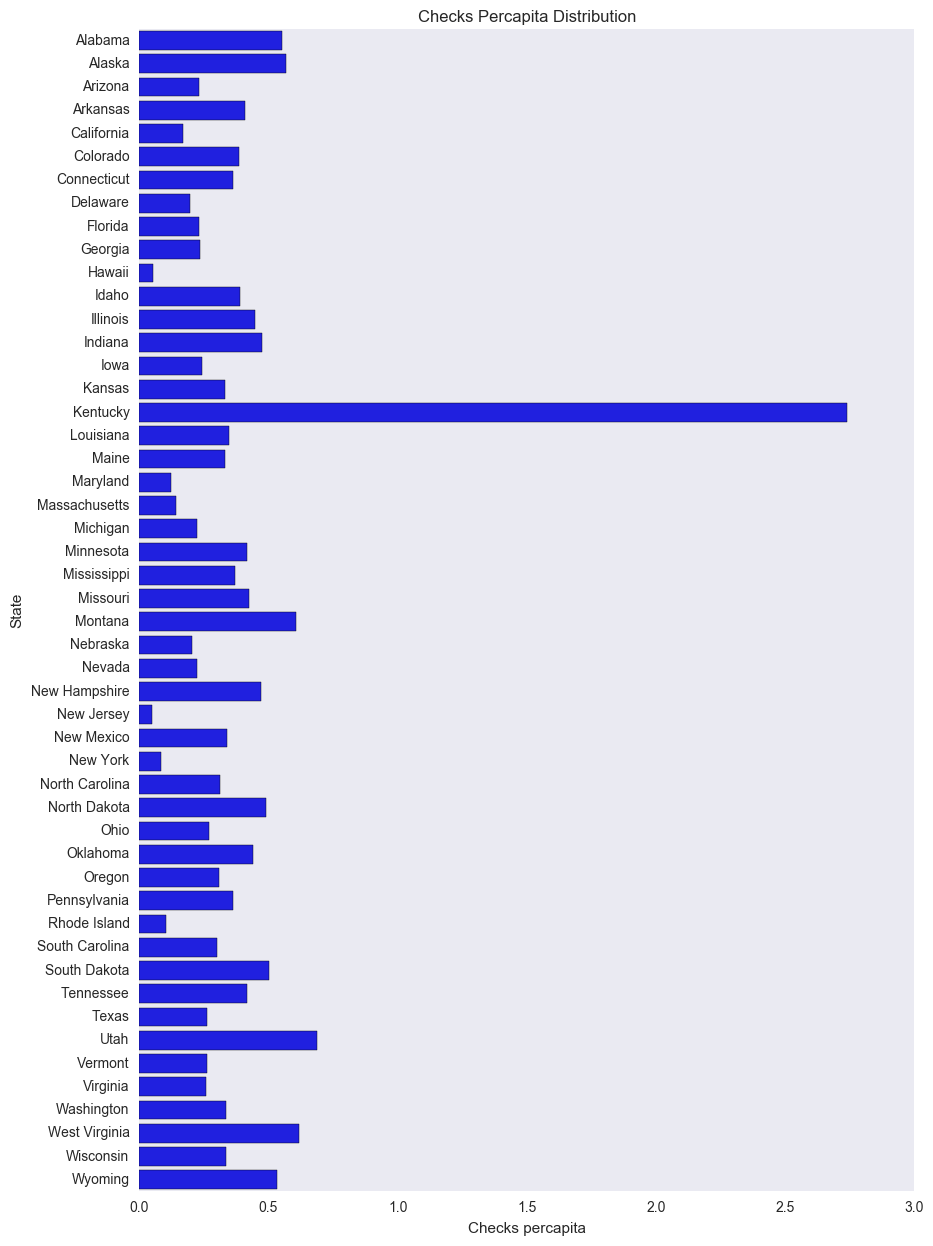

In [44]:
f, ax = plt.subplots(figsize=(10, 15))
t = sns.barplot(x='checks_percapita', y=gun_data_totals_state.index,data = gun_data_totals_state, color = 'b')
ax.set(xlim=(0, 3), ylabel="State",
       xlabel="Checks percapita")
t.set_title('Checks Percapita Distribution')

Some information about the states, which one is more and less populated and the one's who has more and less checks.

In [45]:
#Some useful information about the data
state_bigger_population = gun_data_totals_state['population_estimates'].argmax()
state_lower_population = gun_data_totals_state['population_estimates'].argmin()
state_max_checks = gun_data_totals_state['totalChecks'].argmax()
state_min_checks = gun_data_totals_state['totalChecks'].argmin()
max_checks_per_capita = gun_data_totals_state['checks_percapita'].max()
state_max_checks_per_capita = gun_data_totals_state['checks_percapita'].argmax()
min_checks_per_capita = gun_data_totals_state['checks_percapita'].min()
state_min_checks_per_capita = gun_data_totals_state['checks_percapita'].argmin()
print 'Most Populous state: {} \nLess Populous state: {}\nState with more gun checks:{} \nState with less gun checks: {} \nMax checks per capita: {} \nState with max checks per capita: {} \nMin checks per capita: {}, \nState with min checks per capita: {} \n'.format(state_bigger_population, state_lower_population, state_max_checks, state_min_checks, max_checks_per_capita, state_max_checks_per_capita, min_checks_per_capita, state_min_checks_per_capita)

Most Populous state: California 
Less Populous state: Wyoming
State with more gun checks:Kentucky 
State with less gun checks: Hawaii 
Max checks per capita: 2.74039829848 
State with max checks per capita: Kentucky 
Min checks per capita: 0.0501462971139, 
State with min checks per capita: New Jersey 



The graph below shows the checks percapita for all the states sorted by state ascending.

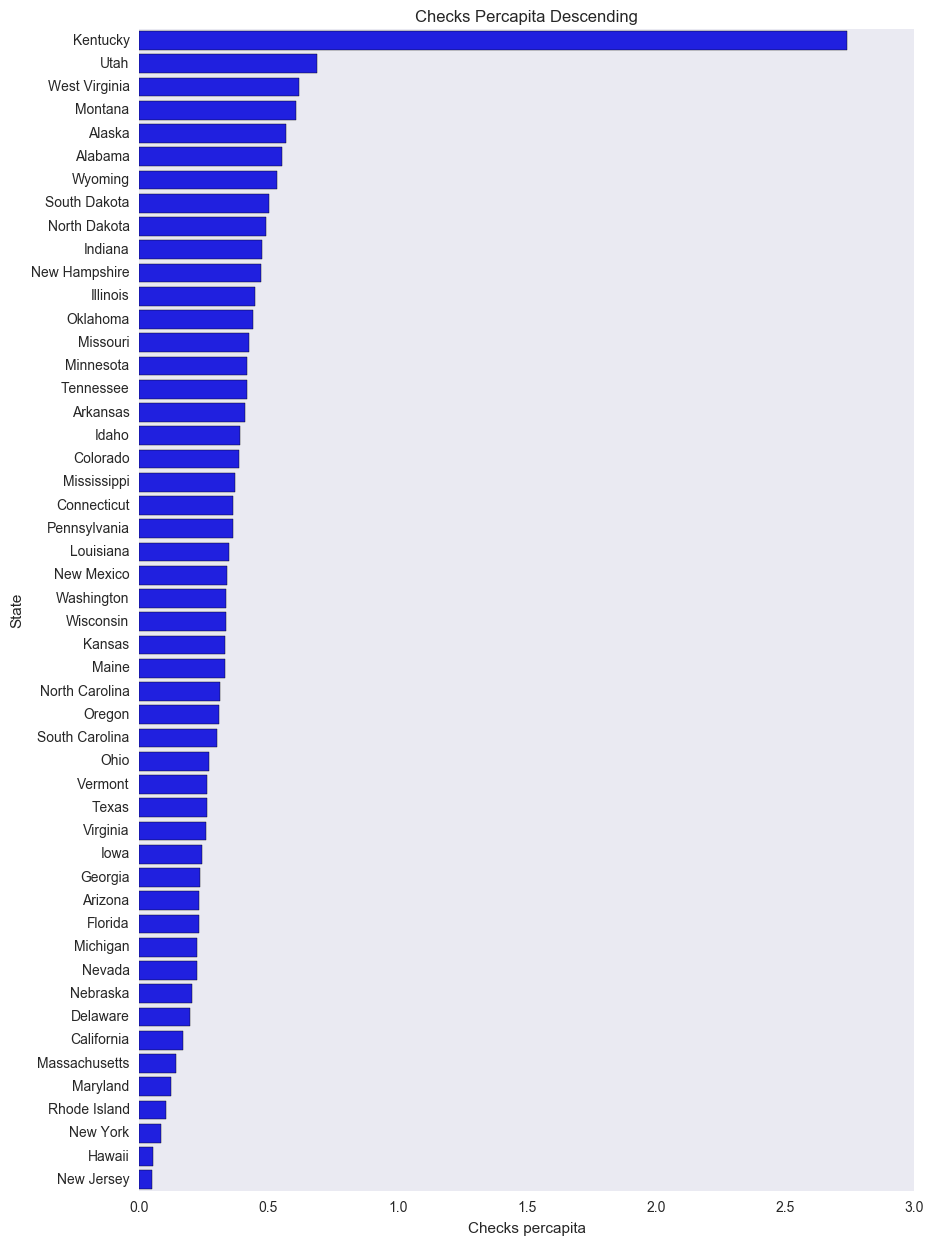

In [46]:
f, ax = plt.subplots(figsize=(10, 15))
guns_checks_order_checks = gun_data_totals_state
guns_checks_order_checks = gun_data_totals_state.sort_values('checks_percapita', ascending=False)
t = sns.barplot(x='checks_percapita', y=guns_checks_order_checks.index,data = guns_checks_order_checks, color = 'b')
ax.set(xlim=(0, 3), ylabel="State",
       xlabel="Checks percapita")
t.set_title('Checks Percapita Descending')

### 1. What are the states with more and the less checks? 

In [47]:
print 'Checks percapita for the second state with more checks, Utah', gun_data_totals_state.loc['Utah','checks_percapita']

Checks percapita for the second state with more checks, Utah 0.686617176032


Some information about the states with more checks percapita and less checks percapita:
* Kentucky has 2.74 checks percapita, and can be considerated an outlier. 
* Utah who has the second position has less than 1 check percapita. 
* The mean for checks percapita for the Interquartile range is 0.34.
* Both New Jersey and Hawaii has less than 0.1 checks and are exceptions.

In [48]:
#Creating a dataset without outiliers in checks percapita
gun_checks_states_IQR = gun_data_totals_state

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)    
    q3 = df_in[col_name].quantile(0.75)    
    iqr = q3-q1 #Interquartile range    
    fence_low  = q1-1.5*iqr    
    fence_high = q3+1.5*iqr    
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]    
    return df_out

gun_checks_states_IQR = remove_outlier(gun_checks_states_IQR, 'checks_percapita')
gun_checks_states_IQR.describe()

,totalChecks,population_estimates,high_school_higher_p,bachelor_degree_higher_p,labor_force_p,median_household_income,percapita_income,poverty_p,checks_percapita
count,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00
mean,"1,804,157.63","6,489,987.12",0.88,0.29,0.64,54.53,28.58,0.13,0.34
std,"1,656,170.54","7,341,267.64",0.03,0.05,0.04,8.91,4.10,0.03,0.15
min,"77,994.00","585,501.00",0.82,0.19,0.54,39.66,21.06,0.07,0.05
25%,"630,800.00","1,831,102.00",0.86,0.26,0.61,47.58,25.74,0.11,0.23
50%,"1,295,949.00","4,681,666.00",0.89,0.28,0.64,53.00,27.68,0.13,0.34
75%,"2,412,865.00","7,288,000.00",0.91,0.32,0.67,60.63,31.12,0.15,0.42
max,"7,265,055.00","39,250,017.00",0.93,0.41,0.70,74.55,38.80,0.21,0.69


Another dataset was created deleting the outlier value for checks percapita. The analysis are going to be performed in both datasets the IQR for checks percapita and the full.

In [49]:
from IPython.display import display, Markdown

#function to print information about the state with highest and lowest data about the column c 
#the p argument it is to inform if the column is a percent or not        
def information_complete(c, p):
    print 'Full Dataset:\n'
    state_highest_c = gun_data_totals_state[c].argmax()       
    checks_per_capita_highest_c = gun_data_totals_state.loc[gun_data_totals_state[c].argmax(), ['checks_percapita']].item()
    state_lowest_c = gun_data_totals_state[c].argmin()
    checks_per_capita_lowest_c = gun_data_totals_state.loc[gun_data_totals_state[c].argmin(), ['checks_percapita']].item()
    if p:
        min_c = gun_data_totals_state[c].min()*100
        max_c = gun_data_totals_state[c].max()*100
        print 'Highest {} state: {} {}%\nChecks percapita state: {} \nLowest {} state: {} {}%\nChecks percapita state: {}\n'.format(c,state_highest_c, max_c, checks_per_capita_highest_c, c, state_lowest_c,min_c, checks_per_capita_lowest_c)
    else:
        min_c = gun_data_totals_state[c].min()
        max_c = gun_data_totals_state[c].max()
        print 'Highest {} state: {} ${}\nChecks percapita state: {} \nLowest {} state: {} ${}\nChecks percapita state: {}\n'.format(c,state_highest_c, max_c, checks_per_capita_highest_c, c, state_lowest_c,min_c, checks_per_capita_lowest_c)
        
    print 'IQR Dataset:\n'
    state_highest_c = gun_checks_states_IQR[c].argmax()       
    checks_per_capita_highest_c = gun_checks_states_IQR.loc[gun_checks_states_IQR[c].argmax(), ['checks_percapita']].item()
    state_lowest_c = gun_checks_states_IQR[c].argmin()
    checks_per_capita_lowest_c = gun_checks_states_IQR.loc[gun_checks_states_IQR[c].argmin(), ['checks_percapita']].item()
    if p:
        min_c = gun_checks_states_IQR[c].min()*100
        max_c = gun_checks_states_IQR[c].max()*100
        print 'Highest {} state: {} {}%\nChecks percapita state: {} \nLowest {} state: {} {}%\nChecks percapita state: {}\n'.format(c,state_highest_c, max_c, checks_per_capita_highest_c, c, state_lowest_c,min_c, checks_per_capita_lowest_c)
    else:
        min_c = gun_data_totals_state[c].min()
        max_c = gun_data_totals_state[c].max()
        print 'Highest {} state: {} ${}\nChecks percapita state: {} \nLowest {} state: {} ${}\nChecks percapita state: {}\n'.format(c,state_highest_c, max_c, checks_per_capita_highest_c, c, state_lowest_c,min_c, checks_per_capita_lowest_c)
        
    median_checks_percapita_fd = gun_data_totals_state['checks_percapita'].median()
    median_checks_percapita_iqrd = gun_checks_states_IQR['checks_percapita'].median()
    
    #all the states with c higher than median 
    gun_data_c_hm = gun_data_totals_state.loc[gun_data_totals_state[c]>gun_data_totals_state[c].median(), ['checks_percapita']]
    median_checks_c_hm = gun_data_c_hm['checks_percapita'].median()
    
    #iqr states with higher higher than median 
    gun_data_c_hm = gun_checks_states_IQR.loc[gun_checks_states_IQR[c]>gun_checks_states_IQR[c].median(), ['checks_percapita']]
    median_checks_c_hm_iqr = gun_data_c_hm['checks_percapita'].median()    
    
    #all the states with c lower than median 
    gun_data_c_lm = gun_data_totals_state.loc[gun_data_totals_state[c]<gun_data_totals_state[c].median(), ['checks_percapita']]
    median_checks_c_lm = gun_data_c_lm['checks_percapita'].median()
    
    #iqr states with higher lower than median 
    gun_data_c_lm = gun_checks_states_IQR.loc[gun_checks_states_IQR[c]<gun_checks_states_IQR[c].median(), ['checks_percapita']]
    median_checks_c_lm_iqr = gun_data_c_lm['checks_percapita'].median()        
        
    print 'Comparisons using mesurings of central tendencies: \n'
    display(Markdown("""
                The median of checks percapita in the states with {c} higher than average is lower than the median for all states?
                

                * Median for all states in full dataset : {median_checks_percapita_fd}
                * Median for all states in IQR dataset : {median_checks_percapita_iqrd}

                Full dataset:
                * Median for states with {c} higher than average: {median_checks_c_hm}

                IQR dataset:
                * Median for states with with {c} higher than average: {median_checks_c_hm_iqr}

                The median of checks percapita in the states with {c} lower than average is higher than the median for all states?                

                Full dataset:
                * Median for states with {c} lower than average: {median_checks_c_lm}

                IQR dataset:
                * Median for states with with {c} lower than average: {median_checks_c_lm_iqr}
    """.format(median_checks_percapita_fd=median_checks_percapita_fd, median_checks_percapita_iqrd=median_checks_percapita_iqrd, c=c, median_checks_c_hm=median_checks_c_hm, median_checks_c_hm_iqr=median_checks_c_hm_iqr, median_checks_c_lm=median_checks_c_lm, median_checks_c_lm_iqr=median_checks_c_lm_iqr)))


A function to print information about the state with highest and lowest data about the column c. The p argument it is to inform if the column is a percent or not.

In [50]:
#Data about the states with the highest checks percapita
gun_data_totals_state.ix[gun_data_totals_state['checks_percapita'].argmax()]

totalChecks                       12,159,076.00
population_estimates               4,436,974.00
high_school_higher_p                       0.84
bachelor_degree_higher_p                   0.22
labor_force_p                              0.59
median_household_income                   43.74
percapita_income                          24.06
poverty_p                                  0.18
checks_percapita                           2.74
Name: Kentucky, dtype: float64

In [51]:
#Data about the state in the second position for checks percapita
gun_data_totals_state.loc['Utah']

totalChecks                        2,095,018.00
population_estimates               3,051,217.00
high_school_higher_p                       0.91
bachelor_degree_higher_p                   0.31
labor_force_p                              0.68
median_household_income                   60.73
percapita_income                          24.69
poverty_p                                  0.10
checks_percapita                           0.69
Name: Utah, dtype: float64

In [52]:
#Data about the states with the lowest checks percapita
gun_data_totals_state.ix[gun_data_totals_state['checks_percapita'].argmin()]

totalChecks                          448,532.00
population_estimates               8,944,469.00
high_school_higher_p                       0.89
bachelor_degree_higher_p                   0.37
labor_force_p                              0.66
median_household_income                   72.09
percapita_income                          36.58
poverty_p                                  0.10
checks_percapita                           0.05
Name: New Jersey, dtype: float64

In [53]:
gun_data_totals_state.loc['Hawaii']

totalChecks                           77,994.00
population_estimates               1,428,557.00
high_school_higher_p                       0.91
bachelor_degree_higher_p                   0.31
labor_force_p                              0.61
median_household_income                   69.52
percapita_income                          29.82
poverty_p                                  0.09
checks_percapita                           0.05
Name: Hawaii, dtype: float64

### 2 - The more educated are the people the less guns they will buy?

In [54]:
gun_data_totals_state['high_school_higher_p'].describe()

count                  50.00
mean                    0.88
std                     0.03
min                     0.82
25%                     0.86
50%                     0.89
75%                     0.91
max                     0.93
Name: high_school_higher_p, dtype: float64

In [55]:
gun_data_totals_state['high_school_higher_p'].median()

0.8885

In [56]:
gun_checks_states_IQR['high_school_higher_p'].median()

0.891

In [57]:
information_complete('high_school_higher_p', True)

Full Dataset:

Highest high_school_higher_p state: Montana 92.8%
Checks percapita state: 0.605072324752 
Lowest high_school_higher_p state: California 81.8%
Checks percapita state: 0.169230347085

IQR Dataset:

Highest high_school_higher_p state: Montana 92.8%
Checks percapita state: 0.605072324752 
Lowest high_school_higher_p state: California 81.8%
Checks percapita state: 0.169230347085

Comparisons using mesurings of central tendencies: 




                The median of checks percapita in the states with high_school_higher_p higher than average is lower than the median for all states?
                

                * Median for all states in full dataset : 0.336950642801
                * Median for all states in IQR dataset : 0.336478673087

                Full dataset:
                * Median for states with high_school_higher_p higher than average: 0.337422612514

                IQR dataset:
                * Median for states with with high_school_higher_p higher than average: 0.349593146043

                The median of checks percapita in the states with high_school_higher_p lower than average is higher than the median for all states?                

                Full dataset:
                * Median for states with high_school_higher_p lower than average: 0.310774700329

                IQR dataset:
                * Median for states with with high_school_higher_p lower than average: 0.305583606291
    

The state with most people with high school or higher did more checks than the state with less people with high school or higher. The median of people who has a high school degree or higher are high, and the standard deviation is low. The data remain very similar for all the states.


In [58]:
information_complete('bachelor_degree_higher_p', True)

Full Dataset:

Highest bachelor_degree_higher_p state: Massachusetts 40.5%
Checks percapita state: 0.141215679487 
Lowest bachelor_degree_higher_p state: West Virginia 19.2%
Checks percapita state: 0.617597490473

IQR Dataset:

Highest bachelor_degree_higher_p state: Massachusetts 40.5%
Checks percapita state: 0.141215679487 
Lowest bachelor_degree_higher_p state: West Virginia 19.2%
Checks percapita state: 0.617597490473

Comparisons using mesurings of central tendencies: 




                The median of checks percapita in the states with bachelor_degree_higher_p higher than average is lower than the median for all states?
                

                * Median for all states in full dataset : 0.336950642801
                * Median for all states in IQR dataset : 0.336478673087

                Full dataset:
                * Median for states with bachelor_degree_higher_p higher than average: 0.310322428554

                IQR dataset:
                * Median for states with with bachelor_degree_higher_p higher than average: 0.286465709677

                The median of checks percapita in the states with bachelor_degree_higher_p lower than average is higher than the median for all states?                

                Full dataset:
                * Median for states with bachelor_degree_higher_p lower than average: 0.39169647207

                IQR dataset:
                * Median for states with with bachelor_degree_higher_p lower than average: 0.380921742271
    

The difference between the checks percapita in the state with most people with bachelor degree or higher and the state with less people with bachelor degree or higher is about 47%. 
States with bachelor degree or higher more than average did about 10% less checks than the states with Bachelor Degree or higher less than average.

### 3. The more wealthy are people the less guns they will need?

The dataset have some data about economic factors that may contribute for the number of checks percapita.
* Poverty percent
* Labor force percent
* Median household income
* Income percapita

We will analyse one by one and find out which one is related to checks percapita.


In [59]:
print gun_checks_states_IQR['poverty_p'].describe()
print gun_checks_states_IQR['poverty_p'].var()
print gun_checks_states_IQR['poverty_p'].median()

count                  49.00
mean                    0.13
std                     0.03
min                     0.07
25%                     0.11
50%                     0.13
75%                     0.15
max                     0.21
Name: poverty_p, dtype: float64
0.000878139455782
0.133


In [60]:
information_complete('poverty_p', True)

Full Dataset:

Highest poverty_p state: Mississippi 20.8%
Checks percapita state: 0.370147012473 
Lowest poverty_p state: New Hampshire 7.3%
Checks percapita state: 0.470769668751

IQR Dataset:

Highest poverty_p state: Mississippi 20.8%
Checks percapita state: 0.370147012473 
Lowest poverty_p state: New Hampshire 7.3%
Checks percapita state: 0.470769668751

Comparisons using mesurings of central tendencies: 




                The median of checks percapita in the states with poverty_p higher than average is lower than the median for all states?
                

                * Median for all states in full dataset : 0.336950642801
                * Median for all states in IQR dataset : 0.336478673087

                Full dataset:
                * Median for states with poverty_p higher than average: 0.337846675781

                IQR dataset:
                * Median for states with with poverty_p higher than average: 0.324310688055

                The median of checks percapita in the states with poverty_p lower than average is higher than the median for all states?                

                Full dataset:
                * Median for states with poverty_p lower than average: 0.333685736953

                IQR dataset:
                * Median for states with with poverty_p lower than average: 0.333685736953
    

The state with the lower percentage of poor people has more checks than the state with the higher percentage. All the median are almost the same than the general one.

In [61]:
information_complete('labor_force_p', True)

Full Dataset:

Highest labor_force_p state: Minnesota 70.0%
Checks percapita state: 0.417515587092 
Lowest labor_force_p state: West Virginia 53.9%
Checks percapita state: 0.617597490473

IQR Dataset:

Highest labor_force_p state: Minnesota 70.0%
Checks percapita state: 0.417515587092 
Lowest labor_force_p state: West Virginia 53.9%
Checks percapita state: 0.617597490473

Comparisons using mesurings of central tendencies: 




                The median of checks percapita in the states with labor_force_p higher than average is lower than the median for all states?
                

                * Median for all states in full dataset : 0.336950642801
                * Median for all states in IQR dataset : 0.336478673087

                Full dataset:
                * Median for states with labor_force_p higher than average: 0.337422612514

                IQR dataset:
                * Median for states with with labor_force_p higher than average: 0.349417358785

                The median of checks percapita in the states with labor_force_p lower than average is higher than the median for all states?                

                Full dataset:
                * Median for states with labor_force_p lower than average: 0.330121616638

                IQR dataset:
                * Median for states with with labor_force_p lower than average: 0.320448158484
    

When we look to the data about the states with the higher and lower working force we observe an impact in checks percapita. The state with the lower rate of people working did about 20% more checks than the state with the higher rate of people working. The median of checks for states with labor force higher than average in IQR dataset is 1% higher than for all states, and the median of checks for states with labor force lower than average in IQR is 1% lower than average.

In [62]:
print gun_data_totals_state['median_household_income'].describe()
print gun_checks_states_IQR['median_household_income'].describe()
print gun_data_totals_state['median_household_income'].median()
print gun_data_totals_state['median_household_income'].var()

count                  50.00
mean                   54.31
std                     8.95
min                    39.66
25%                    47.53
50%                    52.60
75%                    60.60
max                    74.55
Name: median_household_income, dtype: float64
count                  49.00
mean                   54.53
std                     8.91
min                    39.66
25%                    47.58
50%                    53.00
75%                    60.63
max                    74.55
Name: median_household_income, dtype: float64
52.601
80.0940713882


In [63]:
information_complete('median_household_income', False)

Full Dataset:

Highest median_household_income state: Maryland $74.551
Checks percapita state: 0.12278126941 
Lowest median_household_income state: Mississippi $39.665
Checks percapita state: 0.370147012473

IQR Dataset:

Highest median_household_income state: Maryland $74.551
Checks percapita state: 0.12278126941 
Lowest median_household_income state: Mississippi $39.665
Checks percapita state: 0.370147012473

Comparisons using mesurings of central tendencies: 




                The median of checks percapita in the states with median_household_income higher than average is lower than the median for all states?
                

                * Median for all states in full dataset : 0.336950642801
                * Median for all states in IQR dataset : 0.336478673087

                Full dataset:
                * Median for states with median_household_income higher than average: 0.2626089908

                IQR dataset:
                * Median for states with with median_household_income higher than average: 0.299543831944

                The median of checks percapita in the states with median_household_income lower than average is higher than the median for all states?                

                Full dataset:
                * Median for states with median_household_income lower than average: 0.348559038599

                IQR dataset:
                * Median for states with with median_household_income lower than average: 0.34320285719
    

When you look to the data about the states with high and low median household income we observe an impact in checks percapita. The state with the highest household income has 25% less checks than the lowest household income state.

The difference in checks percapita for the states with median household income higher than average and lower than average is about 5%.

In [64]:
print gun_data_totals_state['percapita_income'].describe()
print gun_checks_states_IQR['percapita_income'].describe()
print gun_data_totals_state['percapita_income'].median()
print gun_data_totals_state['percapita_income'].var()

count                  50.00
mean                   28.49
std                     4.10
min                    21.06
25%                    25.44
50%                    27.67
75%                    30.98
max                    38.80
Name: percapita_income, dtype: float64
count                  49.00
mean                   28.58
std                     4.10
min                    21.06
25%                    25.74
50%                    27.68
75%                    31.12
max                    38.80
Name: percapita_income, dtype: float64
27.6695
16.836943971


In [65]:
information_complete('percapita_income', False)

Full Dataset:

Highest percapita_income state: Connecticut $38.803
Checks percapita state: 0.362356044482 
Lowest percapita_income state: Mississippi $21.057
Checks percapita state: 0.370147012473

IQR Dataset:

Highest percapita_income state: Connecticut $38.803
Checks percapita state: 0.362356044482 
Lowest percapita_income state: Mississippi $21.057
Checks percapita state: 0.370147012473

Comparisons using mesurings of central tendencies: 




                The median of checks percapita in the states with percapita_income higher than average is lower than the median for all states?
                

                * Median for all states in full dataset : 0.336950642801
                * Median for all states in IQR dataset : 0.336478673087

                Full dataset:
                * Median for states with percapita_income higher than average: 0.310322428554

                IQR dataset:
                * Median for states with with percapita_income higher than average: 0.29675089581

                The median of checks percapita in the states with percapita_income lower than average is higher than the median for all states?                

                Full dataset:
                * Median for states with percapita_income lower than average: 0.370147012473

                IQR dataset:
                * Median for states with with percapita_income lower than average: 0.359353025536
    

When you look to the data about the states with high and low percapita income we observe a low impact in checks percapita. The state with the highest percapita income has 1% less checks than the lowest percapita income state.

The difference in checks percapita for the states with percapita income higher than average and lower than average is about 6%.

### Joining the combination of factors with most impact in checks percapita (Bachelor Degree or Higher, Labor Force and Median Household Income)

In [66]:
print gun_checks_states_IQR['bachelor_degree_higher_p'].describe()
print gun_checks_states_IQR['labor_force_p'].describe()
print gun_checks_states_IQR['median_household_income'].describe()

count                  49.00
mean                    0.29
std                     0.05
min                     0.19
25%                     0.26
50%                     0.28
75%                     0.32
max                     0.41
Name: bachelor_degree_higher_p, dtype: float64
count                  49.00
mean                    0.64
std                     0.04
min                     0.54
25%                     0.61
50%                     0.64
75%                     0.67
max                     0.70
Name: labor_force_p, dtype: float64
count                  49.00
mean                   54.53
std                     8.91
min                    39.66
25%                    47.58
50%                    53.00
75%                    60.63
max                    74.55
Name: median_household_income, dtype: float64


In [67]:
print 'Full Database '
print'Median checks percapita for states with bachelor degree or higher, labor force percent and median household income less than average:'
gun_join_b_l_m = gun_data_totals_state.loc[(gun_data_totals_state['labor_force_p']<gun_data_totals_state['labor_force_p'].median()) & (gun_data_totals_state['bachelor_degree_higher_p']<gun_data_totals_state['bachelor_degree_higher_p'].median()) & (gun_data_totals_state['median_household_income']<gun_data_totals_state['median_household_income'].median()) , ['checks_percapita']]
print gun_join_b_l_m['checks_percapita'].median()

print'Median checks percapita for states with bachelor degree or higher, labor force percent and median household income high than average:'
gun_join_b_l_m = gun_data_totals_state.loc[(gun_data_totals_state['labor_force_p']>gun_data_totals_state['labor_force_p'].median()) & (gun_data_totals_state['bachelor_degree_higher_p']>gun_data_totals_state['bachelor_degree_higher_p'].median()) & (gun_data_totals_state['median_household_income']>gun_data_totals_state['median_household_income'].median()) , ['checks_percapita']]
print gun_join_b_l_m['checks_percapita'].median()
print '\n'
print 'IQR Database '
print'Median checks percapita for states with bachelor degree or higher, labor force percent and median household income less than average:'
gun_join_b_l_m = gun_checks_states_IQR.loc[(gun_checks_states_IQR['labor_force_p']<gun_checks_states_IQR['labor_force_p'].median()) & (gun_checks_states_IQR['bachelor_degree_higher_p']<gun_checks_states_IQR['bachelor_degree_higher_p'].median()) & (gun_checks_states_IQR['median_household_income']<gun_checks_states_IQR['median_household_income'].median()) , ['checks_percapita']]
print gun_join_b_l_m['checks_percapita'].median()

print'Median checks percapita for states with bachelor degree or higher, labor force percent and median household income high than average:'
gun_join_b_l_m = gun_checks_states_IQR.loc[(gun_checks_states_IQR['labor_force_p']>gun_checks_states_IQR['labor_force_p'].median()) & (gun_checks_states_IQR['bachelor_degree_higher_p']>gun_checks_states_IQR['bachelor_degree_higher_p'].median()) & (gun_checks_states_IQR['median_household_income']>gun_checks_states_IQR['median_household_income'].median()) , ['checks_percapita']]
print gun_join_b_l_m['checks_percapita'].median()

Full Database 
Median checks percapita for states with bachelor degree or higher, labor force percent and median household income less than average:
0.380921742271
Median checks percapita for states with bachelor degree or higher, labor force percent and median household income high than average:
0.300015801657


IQR Database 
Median checks percapita for states with bachelor degree or higher, labor force percent and median household income less than average:
0.370147012473
Median checks percapita for states with bachelor degree or higher, labor force percent and median household income high than average:
0.312482517641


The states with the combination of the three factor lower than average shows a median or checks percapita about 6% higher than for states with the combination of the factor higher than average.

In [68]:
print 'Some measures of central tendency about the states with checks percapita lower than average'
gun_states_checks_bm = gun_checks_states_IQR.loc[gun_checks_states_IQR['checks_percapita']<gun_checks_states_IQR['checks_percapita'].median()]
print 'Poverty'
print 'Median: ', gun_states_checks_bm['poverty_p'].median()*100, '%'
print 'Standard deviation: ', gun_states_checks_bm['poverty_p'].std()
print 'Variance: ', gun_states_checks_bm['poverty_p'].var(), '\n'

print 'Labor Force'
print 'Median: ',gun_states_checks_bm['labor_force_p'].median()*100, '%'
print 'Standard deviation: ',gun_states_checks_bm['labor_force_p'].std()
print 'Variance: ', gun_states_checks_bm['labor_force_p'].var(), '\n'

print 'Bachelor Degree or higher'
print 'Median: ', gun_states_checks_bm['bachelor_degree_higher_p'].median()*100, '%'
print 'Standard deviation: ',gun_states_checks_bm['bachelor_degree_higher_p'].std()
print 'Variance: ', gun_states_checks_bm['bachelor_degree_higher_p'].var(), '\n'

print 'Median household income'
print 'Median: ', gun_states_checks_bm['median_household_income'].median(), '$'
print 'Standard deviation: ',gun_states_checks_bm['median_household_income'].std()
print 'Variance: ', gun_states_checks_bm['median_household_income'].var(), '\n'

print 'Percapita Income'
print 'Median: ', gun_states_checks_bm['percapita_income'].median(), '$'
print 'Standard deviation: ',gun_states_checks_bm['percapita_income'].std()
print 'Variance: ', gun_states_checks_bm['percapita_income'].var()
print'\n'


print 'Some measures of central tendency about the states with checks percapita higher than average'
gun_states_checks_bm = gun_checks_states_IQR.loc[gun_checks_states_IQR['checks_percapita']>gun_checks_states_IQR['checks_percapita'].median()]
print 'Poverty'
print 'Median: ', gun_states_checks_bm['poverty_p'].median()*100, '%'
print 'Standard deviation: ', gun_states_checks_bm['poverty_p'].std()
print 'Variance: ', gun_states_checks_bm['poverty_p'].var(), '\n'

print 'Labor Force'
print 'Median: ',gun_states_checks_bm['labor_force_p'].median()*100, '%'
print 'Standard deviation: ',gun_states_checks_bm['labor_force_p'].std()
print 'Variance: ', gun_states_checks_bm['labor_force_p'].var(), '\n'

print 'Bachelor Degree or higher'
print 'Median: ', gun_states_checks_bm['bachelor_degree_higher_p'].median()*100, '%'
print 'Standard deviation: ',gun_states_checks_bm['bachelor_degree_higher_p'].std()
print 'Variance: ', gun_states_checks_bm['bachelor_degree_higher_p'].var(), '\n'

print 'Median household income'
print 'Median: ', gun_states_checks_bm['median_household_income'].median(), '$'
print 'Standard deviation: ',gun_states_checks_bm['median_household_income'].std()
print 'Variance: ', gun_states_checks_bm['median_household_income'].var(), '\n'

print 'Percapita Income'
print 'Median: ', gun_states_checks_bm['percapita_income'].median(), '$'
print 'Standard deviation: ',gun_states_checks_bm['percapita_income'].std()
print 'Variance: ', gun_states_checks_bm['percapita_income'].var()
print'\n'

Some measures of central tendency about the states with checks percapita lower than average
Poverty
Median:  13.05 %
Standard deviation:  0.0211666524021
Variance:  0.000448027173913 

Labor Force
Median:  63.35 %
Standard deviation:  0.028452063678
Variance:  0.000809519927536 

Bachelor Degree or higher
Median:  29.65 %
Standard deviation:  0.0436912752873
Variance:  0.00190892753623 

Median household income
Median:  53.09 $
Standard deviation:  8.44099637123
Variance:  71.2504197391 

Percapita Income
Median:  27.794 $
Standard deviation:  3.70366293986
Variance:  13.7171191721


Some measures of central tendency about the states with checks percapita higher than average
Poverty
Median:  13.3 %
Standard deviation:  0.0366823171474
Variance:  0.0013455923913 

Labor Force
Median:  63.55 %
Standard deviation:  0.0435814870615
Variance:  0.00189934601449 

Bachelor Degree or higher
Median:  27.05 %
Standard deviation:  0.0515452348126
Variance:  0.00265691123188 

Median household inc

<a id='conclusions'></a>
## Conclusions


Measures of central tendency were computed to summarize the data for the variables that could help us understand the quantity of checks percapita by state. Measures of dispersion were computed to understand the variability of the data. The median instead of a mean was chosen because the distribution of the data is skewed.

The questions are about educational variables and economic variables and how they could help to understand the total checks per guns in the states between 2011 and 2015.

For the variables about education the mean of people with high school or higher is 88% and the standard deviation is 0.03. The state that more people attended at least to high school has 44% more checks percapita  than the state that less people attended at least to high school. For people with bachelor degree or higher, the difference in checks for the state with the high percentage of people with bachelor degree or higher and the low percentage of people with bachelor degree or higher is 47%. The median of checks for states with bachelor degree or higher above average is 10% lower than the median for states with bachelor degree or higher below average.

Analysing the economic factors starting with poverty. The state with the lowest percentage of poor people has more checks than the state with the higher percent. Analysing the percentage of people in labor force, the state with the lower percentage of people working did about 20% more checks than the state with the higher percentage of people working. Using the measures of central tendency and checking if states with higher labor force did less checks we had the oposite. States with labor force lower than median have 1% lower checks than average. Analysing the median household income, the state with higher median household income did 25% less checks than the state with lower median household income. The difference in checks percapita for the states with median household income higher than average and lower than average is about 5%. The state with the lowest percapita income has 1% more checks than the state with the highest percapita income. The difference in checks percapita for the states with percapita income higher than average and lower than average is about 6%.

Another analysis was to join the factors that has more difference in checks percapita and analyse the checks for this states. The states with bachelor degree or higher above average, labor force above average and median household income above average did 6% less checks than the median for states below average.



